In [91]:
import pandas as pd
import numpy as np 
import snap
import networkx as nx
import seaborn as sns 
import matplotlib.pyplot as plt
import igraph as ig
import nxviz as nv
import random

The Data that I analyzed was sourced from [konect](http://konect.cc/networks/brunson_revolution/). I chose to use the "American Revolution" dataset, which is a network of the membership information from 136 people in 5 organizations from slightly before the American Revolution. Unfortunately the names of the people and the names of the organizations are not available, but it includes many well known figures at this time, such as Paul Revere. The first step in analyzing this data was to load it in from a text file that contained the node relationships. I chose this graph because it is a bipartite network, meaning that it is a network that contains nodes of two different characteristics that are linked together. I felt that this would be an interesting challenge to plot.

In [62]:
## First load American Revolution Data into Dataframe
rev_file = "out_rev_file.txt"
rev_df = pd.read_csv(rev_file, sep = " ", skiprows = 2, header = None)

I started out by simply trying to plot the network as is, to see what the connections looked like. Obviously this is not a meaningful way to visualize this network.

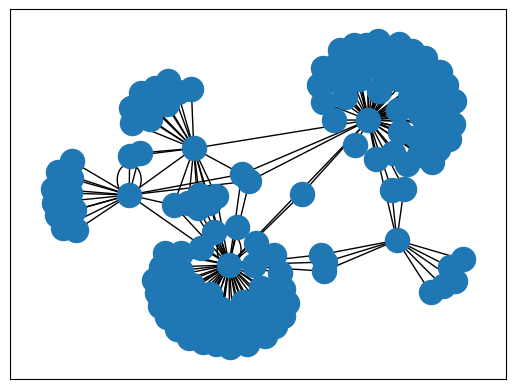

In [63]:
nx.draw_networkx(G, with_labels = False)

Next I added more specific names for columns

In [64]:
rev_df = rev_df.iloc[:, 0:2]
rev_df.columns = ["Person", "Organization"]

In [65]:
## Look at data frame
rev_df

,Person,Organization
0,1,1
1,1,2
2,2,1
3,2,2
4,2,3
...,...,...
155,133,4
156,134,2
157,135,1
158,136,1


I prefer the organizations to be denoted by letters, rather than numbers. I think it makes the bipartite relationship more apparent

In [66]:
convention = {1:"A", 2:"B", 3:"C", 4:"D", 5:"E"}

In [68]:
rev_df["Organization"] = rev_df["Organization"].replace(convention)

In [69]:
rev_df

,Person,Organization
0,1,A
1,1,B
2,2,A
3,2,B
4,2,C
...,...,...
155,133,D
156,134,B
157,135,A
158,136,A


Next, I made a saved a list of the unique nodes belonging to people and organizations. 

In [77]:
G = nx.Graph()
G = nx.from_pandas_edgelist(rev_df, "Person", "Organization")
x = rev_df["Person"].unique()
y = rev_df["Organization"].unique()
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136]


Using the separated nodes, I created a new network where the bipartite relationship is specified.

In [80]:
B = nx.Graph()
B.add_nodes_from(x, bipartite = 0)
B.add_nodes_from(y, bipartite = 1)
B.add_edges_from(G.edges)


True

In the documentation for networkx, I read that there is a plotting function specifically for bipartite networks. I tried to use this, but the results seemed to be extremely messy and unclear, so I decided to try something else. 

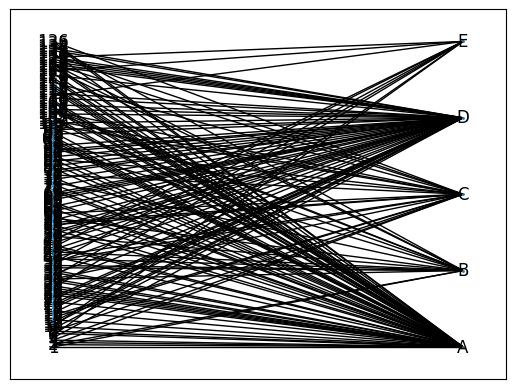

In [88]:
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,x), width = 1,node_size = 1)

For a more clear network, I wanted to add color to the edges. I created a list that was to denote different color edges, depending on what organization the revolutionary figure was connected to.

In [102]:
edge_colors = []
for ed in B.edges(data = False):
    if ed[1] == "A":
        edge_colors.append("green")
    if ed[1] == "B":
        edge_colors.append("Blue")
    if ed[1] == "C":
        edge_colors.append("Red")
    if ed[1] == "D":
        edge_colors.append("Yellow")
    if ed[1] == "E":
        edge_colors.append("Purple")
        
edge_colors

['green',
 'Blue',
 'green',
 'Blue',
 'Red',
 'green',
 'green',
 'Red',
 'Yellow',
 'Purple',
 'green',
 'green',
 'Red',
 'Yellow',
 'green',
 'Purple',
 'Yellow',
 'Yellow',
 'green',
 'Red',
 'Red',
 'Yellow',
 'green',
 'Yellow',
 'Yellow',
 'Yellow',
 'green',
 'Yellow',
 'Yellow',
 'green',
 'green',
 'green',
 'green',
 'Purple',
 'green',
 'Yellow',
 'green',
 'green',
 'Blue',
 'Red',
 'Purple',
 'Yellow',
 'green',
 'green',
 'Blue',
 'Blue',
 'Yellow',
 'Purple',
 'Red',
 'Blue',
 'green',
 'Red',
 'Yellow',
 'Blue',
 'Yellow',
 'green',
 'Purple',
 'green',
 'Yellow',
 'Purple',
 'Yellow',
 'Blue',
 'Yellow',
 'Yellow',
 'green',
 'Yellow',
 'green',
 'Red',
 'Red',
 'Yellow',
 'Blue',
 'green',
 'Red',
 'Yellow',
 'green',
 'Yellow',
 'green',
 'green',
 'Yellow',
 'Yellow',
 'Yellow',
 'Yellow',
 'green',
 'green',
 'Yellow',
 'green',
 'Blue',
 'Yellow',
 'green',
 'Red',
 'Yellow',
 'Yellow',
 'green',
 'Yellow',
 'green',
 'Yellow',
 'green',
 'Red',
 'Yellow',
 'gre

I wanted to avoid having labels for all the people, and only have labels for the organizations that everyone was connected to.

In [116]:
labels = {}
for node in B.nodes():
    if node in y:
        labels[node] = node

Putting it all together, we were left with this plot of important pre-revolutionary figures and organizations that they connected to. We are able to see that organization A and D contained the most members. There are 0 figures that were connected to all 5 organizations but several that were connected to 3. More information is needed on the network.

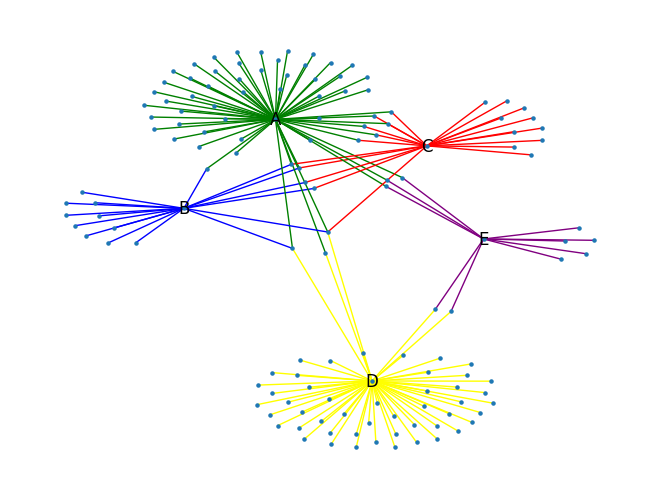

In [121]:
## Plot the network. Only label the important Nodes
nx.draw(B, edge_color = edge_colors, node_size = 5, with_labels = True, labels = labels)


One core task of the assignment is to determine the diameter of the graph. The diameter is the shortest distance between the two most distance nodes in the network. Using the nx.diameter function, it was determined to be 6.

In [124]:
## What is the Diameter
nx.diameter(B)

6

Another measure that I was interested in was the centrality of the organizations. Degree centrality is a measure of the number of connections each node has in a network. We would expect all of the organizations to have the highest degree centrality. 

In [148]:
## Compute Centrality
degree_cent = nx.degree_centrality(B)
degree_cent = dict(sorted(degree_cent.items(), key = lambda item: item[1], reverse = True))
pd.Series(degree_cent).sort_values(ascending = False).head()

A    0.421429
D    0.378571
C    0.150000
B    0.121429
E    0.071429
dtype: float64

Betweenness centrality is a measure of how much nodes lie on the paths between other nodes. Once again, the organizations are expected to have the highest betweenness centrality.

In [150]:
## Compute Betweeness
between = nx.betweenness_centrality(B, normalized= True, endpoints = True)
between = dict(sorted(between.items(), key = lambda item: item[1], reverse = True))
pd.Series(between).sort_values(ascending = False).head(10)
    

A      0.619941
D      0.590485
126    0.233635
C      0.177014
B      0.168789
106    0.152363
125    0.103490
E      0.095646
31     0.038508
2      0.038508
dtype: float64

In [153]:
for n in B.edges():
    if n[0] == 126:
        print(n)

(126, 'A')
(126, 'B')
(126, 'C')
(126, 'D')


In [154]:
for n in B.edges():
    if n[0] == 106:
        print(n)

(106, 'A')
(106, 'B')
(106, 'D')


In [158]:
labels[126] = 126
labels[106] = 106
labels[105] = 105

Here we can see that the non-organization nodes that have a high betweenness centrality are extremely interconnected in the network.

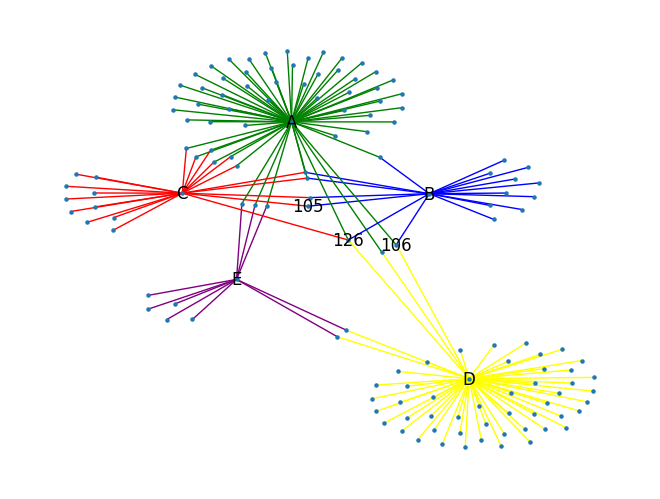

In [159]:
nx.draw(B, edge_color = edge_colors, node_size = 5, with_labels = True, labels = labels)

Conclusions that can be made:

* The order of importance of organizations to pre-revolutionary figures was likely: A, D, C, B, E
* The people that were most important to these organizations based on centrality measures were likely those represented by numbers: 126, 106, and 125 